# DUN 28.04.16
## Intermitencyje

Ostatnio: trzy generyczne intermitencje z charakterystycznymi zachowaniami

Wykrywanie intermitencji i rozpoznawanie. Czy eksperyment pasuje do jednego z tych trzech? Generalnie nie musi.

### Intermitencja t1: natężenie światła w laserze 4-poziomowej

Sztuczka eksperymentatorska: po prostu bierzemy szereg czasowy i robimy $I(n+1) = f(I(n))$

Zbiega do krzywej stycznej do przekątnej

Zmieniamy siłę pompowania: zmienia się okres intermitencji...

Rozpoznawanie końca fazy laminarnej: tam gdzie amplituda jest wyższa niż średnia kilku poprzednich. Różnice kolejnych indeksów: długości faz laminarnych. Można zrobić histogram. Podkowa, ale bez lewej strony: bo nie da się znaleźć np. fazy laminarnej o długości 1!

> Faza laminarna dla Biełousowa - Żabotyńskiego, w postaci ASCII: `................................|......................`

> Dobry sposób liczenia tego: obliczenie rSTD (na pięciu kolejnych) punktach. Wyraźne zmiany rSTD na obszarach chaotycznych.

Wychodzi z przykładu z laserem log-nachylenie -0.52, prawie dokładnie jeden przez pierwiastek. Nice.

### Intermitencja T3: konwekcja Rayleigha-Benarda, *subcritical pitchfork bifurcation*
(ta z punktem przegięcia $x_n^3$)

Przepuszczamy światło z dobraną polaryzacją. Modulacja światła: takie trochę marchewki na wykresie. Gęsta część środkowa + symetryczne odbicia takiego jakby dymku.

Trik: wyznaczamy $x_{n+2} = f(x_n)$, czyli dwukrotne złożenie naszej funkcji. Zaczynając od dodatniej dostajemy górną gałąź, zaczynając od ujemnej: dolną gałąź.


### Intermitencja T3: nieliniowa dioda w układzie elektronicznym
$V(t)$, znowu: gęsty środek i okresowe zaburzenia ** *symetryczne wzg. średniej* **

### Intermitencja T2: dodatkowa częstość w układzie
AKA Bifurkacja Hopfa

* Różne skale czasowe? Drgania z modulacją. Yup, to jest to. Dodatkowa częstość daje ruch po torusie (GYRATION! GYRORADIUS! WOOOOOOOOT PLAZEMKI!)
* Wygląda jak trzy sygnały splecione ze sobą -> wyświetlamy co trzecią próbkę
* Na Poincare return mapie: prosta prawie przekątna, nieco nad. Wtedy odwzorowanie jest spiralne - ruch jest kwaziperiodyczny.
* Globalne przyciąganie do niestabilnego punktu stałego, po zbliżeniu zostajemy odrzuceni na dużą odległość. To troszkę jak kolizje cząstek...?

* Od punktu stałego do cyklu granicznego (note: nie jedyna bifurkacja która tak robi!)

* Może prowadzić do quasiperiodyczności

## Szumy

Szum $1/f$: $P \sim 1/f$

Pojawia się w ciałach stałych, układach elektronicznych (to nie jest *shot noise*!), obrocie Ziemi (zmienność $\omega$), głosie (głośność), membranach nerwowych, ruchu na autostradach

Zjawisko **bezskalowe** - własności statystyczne podobne dla $10^0$ Hz jak dla $10^3$ Hz. Charakterystyczne dla fraktali.

Modele lawinowe
* schodkowa siatka
* rozkładamy cząstki na siatce
* Gdy oczko przekroczy gęstość krytyczną, zsyp na kolejną siatkę

Szum $1/f^2$ - idzie opisać random walkiem

## Liniowe i nieliniowe oscylatory
* Oscylator harmoniczny: jedyny faktycznie STAŁY i NIEZMIENIALNY parametr: częstość
    * Brak stanów nieustalonych
* Dwa sprzężone oscylatory:
    * przekaz energii - wydajnie tylko przez tarcie ($-\gamma \dot{x}$, $\gamma$ jest nieliniowa)
* Rezonans - zjawisko czysto liniowe - nieliniowe tłumienia

> Nieliniowe jak nieczarne

Częsty typ: oscylator z cyklem granicznym *van der Pola*.

$$x'' + \mu (x^2 - 1)x' + x = 0$$

Inaczej
$$x' = y$$
$$y' = \mu (1-x^2)y - x$$

Zakładamy $\mu > 0$

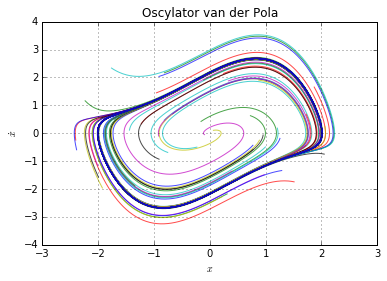

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def vdp(r, t, mu):
    x, y = r
    return np.array([y, mu*(1-x*x)*y - x])

mu = 1
t = np.linspace(0, 100, 10000)
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.title('Oscylator van der Pola')
max_init = 5
plt.grid()
for i in range(50):
    r = odeint(vdp, max_init*np.random.random(2)-max_init/2, t, args=(mu,)).T
    x, y = r
    plt.plot(x, y, alpha=0.7)

Z dowolnego punktu w przestrzeni zbiegamy do krzywej granicznej.

W przeciwieństwie do oscylatora harmonicznego, amplituda NIE jest funkcją fazy - mamy kilka amplitud np. na fazie $\pi/2$. Ciąg amplitud na danej fazie zbiega po długiej liczbie obiegów do wartości wskazywanej przez cykl graniczny.

Przykład: Oscylator z diodą nieliniową, wymyślony żeby symulować arytmię.

### Sprzężone oscylatory nieliniowe
Często próbują "uzgodnić zachowanie", poetycko: *"śpiewać wspólnie"*.

Jeśli jeden jest silniejszy, ustala zachowanie drugiego. **synchronizacja synfazowa**

Wymierne stosunki częstości oscylacji (tokamaki...)

Serce działa jak oscylator nieliniowy

* **quasiperiodyczność** - zgodny ruch, niewymierny stosunek częstości - daje wrażenie regularności

* **ruch chaotyczny**

> silny, niezależny oscylator z duszą

* niezależne zachowanie od zewnętrznych warunków
* łatwość snchronizacji, co pozwala symulować w
    * biologii
        > cykl 27 godzinny; najszybszy oscylator relaksacyjny przewodzi

    * technicznych
        * **modelocking?**
        * lock-in amp: oscylator liniowy, może wykryć składową harmoniczną w zaszumionym sygnale
        * strojenie: synchronizacja między wewnętrznym a zewnętrznym oscylatorem